Loads data in proper format..(under construction)

* Read all data from first folder
* Get max depth
* Iterate over all data
    if depth is less than max 
        pad it


In [1]:
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
raw_images = []
raw_images_depth = []

for i in range(1,16):
    img_3d = None
    img_3d = np.load("img_datas_1/{}.npy".format(i))
    raw_images.append(img_3d)
    raw_images_depth.append(img_3d.shape[-1])
    
print(len(raw_images))

15


In [3]:
raw_images_depth

[128, 122, 113, 120, 116, 131, 123, 132, 144, 131, 133, 132, 129, 116, 130]

In [4]:
max_depth = max(raw_images_depth)
max_depth

144

In [6]:
# the dummy
dummy = np.zeros((512, 512))
dummy.shape

(512, 512)

In [7]:
a = raw_images[0] # target image

the_change = 16
b = np.array(np.dstack([dummy for i in range(the_change)])) # dummy volume

a.shape, b.shape

((512, 512, 128), (512, 512, 16))

In [8]:
# stacked across depth
img_padded = np.dstack((a,b))
img_padded.shape

(512, 512, 144)

In [30]:
np.save("new.npy", img_padded)
np.save("old.npy", a)

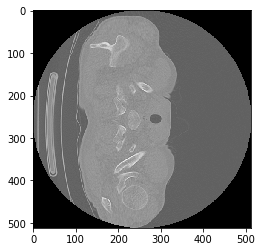

In [11]:
#sanity check

# try values from 128 onwards 
# should be black like a negro!

plt.imshow(img_padded[:,:,127], cmap="gray")

Data loader

In [12]:
images_converted = []

for img in raw_images:
    depth = img.shape[-1]
    depth_thresh = max_depth - depth
    
    if depth_thresh > 0:
        extra_slices = np.array(np.dstack([dummy for i in range(depth_thresh)]))
    
    img_padded = None
    img_padded = np.dstack((img,extra_slices))
    print("Before: {}   -------    After: {}".format(img.shape, img_padded.shape))
    images_converted.append(img_padded)
    
print(len(images_converted))

Before: (512, 512, 128)   -------    After: (512, 512, 144)
Before: (512, 512, 122)   -------    After: (512, 512, 144)
Before: (512, 512, 113)   -------    After: (512, 512, 144)
Before: (512, 512, 120)   -------    After: (512, 512, 144)
Before: (512, 512, 116)   -------    After: (512, 512, 144)
Before: (512, 512, 131)   -------    After: (512, 512, 144)
Before: (512, 512, 123)   -------    After: (512, 512, 144)
Before: (512, 512, 132)   -------    After: (512, 512, 144)
Before: (512, 512, 144)   -------    After: (512, 512, 156)
Before: (512, 512, 131)   -------    After: (512, 512, 144)
Before: (512, 512, 133)   -------    After: (512, 512, 144)
Before: (512, 512, 132)   -------    After: (512, 512, 144)
Before: (512, 512, 129)   -------    After: (512, 512, 144)
Before: (512, 512, 116)   -------    After: (512, 512, 144)
Before: (512, 512, 130)   -------    After: (512, 512, 144)
15


Small bug:
    Need fix for max depth image

In [14]:
images_converted = np.array(images_converted[:5])
images_converted.shape

(5, 512, 512, 144)

In [15]:
np.save("batch_of_3d.npy", images_converted)

In [29]:
images_converted = []

for img in raw_images:
    depth = img.shape[-1]
    depth_thresh = max_depth - depth
    
    if depth_thresh == 0:
        print("depth is 0 now")
        print(img.shape)
        images_converted.append(img)
    
    if depth_thresh > 0:
        extra_slices = np.array(np.dstack([dummy for i in range(depth_thresh)]))
    
    print(depth_thresh, extra_slices.shape)
    
print(len(images_converted))

16 (512, 512, 16)
22 (512, 512, 22)
31 (512, 512, 31)
24 (512, 512, 24)
28 (512, 512, 28)
13 (512, 512, 13)
21 (512, 512, 21)
12 (512, 512, 12)
depth is 0 now
(512, 512, 144)
0 (512, 512, 12)
13 (512, 512, 13)
11 (512, 512, 11)
12 (512, 512, 12)
15 (512, 512, 15)
28 (512, 512, 28)
14 (512, 512, 14)
1
